In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Download the data file above and read it into a pandas DataFrame.
file_path = "C:\\Users\\andre\\OIM7502_SP25\\data\\homes.csv"
df = pd.read_csv(file_path)

In [5]:
# 2. Add the code necessary to describe the dataset.
df.columns = df.columns.str.strip().str.replace('"', '')

In [7]:
# 3. Using markdown commentary describe the dataset.
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


None

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [9]:
# 4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it, and the results of each analysis.
# Summary Statistics
display(df.describe())

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [11]:
# Correlation Matrix
correlation_matrix = df.corr()
display(correlation_matrix)

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
List,0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


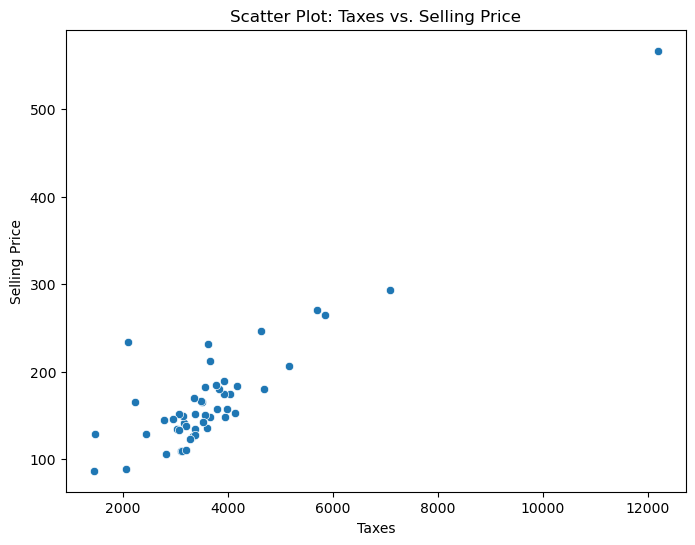

In [13]:
# Scatter Plot: Taxes vs. Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Taxes"], y=df["Sell"])
plt.title("Scatter Plot: Taxes vs. Selling Price")
plt.xlabel("Taxes")
plt.ylabel("Selling Price")
plt.show()

In [15]:
# 5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model.
# Linear Regression: Taxes as Independent Variable
X = df["Taxes"]
y = df["Sell"]
X = sm.add_constant(X)  # Add constant term
model = sm.OLS(y, X).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        19:49:50   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 6. In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?
# Based on the model output, we observe the following key statistics:
# - **R-squared = 0.809**: This means that approximately 80.9% of the variance in selling price can be explained by property taxes, which indicates a strong relationship.
# - **Coefficient for Taxes = 0.0414**: This suggests that for every unit increase in property tax, the selling price increases by approximately 0.0414.
# - **p-value for Taxes = 0.000**: Since this value is below 0.05, the relationship between taxes and selling price is statistically significant.
# - **F-statistic = 203.1**: A high F-statistic further confirms the model's significance.
# Conclusion: Taxes appear to be a strong predictor of selling price based on the high R-squared value and the statistical significance of the coefficient. However, it is important to consider other factors such as living area, number of rooms, and listing price, which may also contribute significantly to selling price.; is taxes a good predictor for selling price? Why or why not?

In [17]:
# 7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model?
# Step 8: Linear Regression: Living Area as Independent Variable
X_living = df["Living"]
y = df["Sell"]
X_living = sm.add_constant(X_living)  # Add constant term
model_living = sm.OLS(y, X_living).fit()
display(model_living.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           4.39e-17
Time:                        19:53:24   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.532     -18.749      35.856
Living         7.6613      0.599     12.796      0.000       6.458       8.865
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.793
Skew:                          -0.399   Prob(JB):                        0.247
Kurtosis:                       3.838   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Comparison of the models:
# - **Taxes Model (R² = 0.809)** vs **Living Model (R² = 0.773)**: Taxes explain slightly more variance in selling price than living area, making it the better predictor in this case.
# - **Why is the Taxes model better?**
#   - Higher R-squared value (0.809 vs 0.773), meaning it explains more of the variation in selling price.
#   - The F-statistic is higher, indicating a stronger overall model.
#   - The relationship between taxes and selling price is more direct, as property taxes are typically assessed based on property value.
# - **Limitations**:
#   - These are simple linear regression models with only one predictor each. A multiple regression model incorporating multiple variables may provide a more accurate prediction.
#   - The models do not account for potential interactions between variables.
#   - External factors such as market trends, location desirability, neighborhood attributes, and economic conditions are not considered, which may impact selling prices significantly.
#   - The dataset may have outliers that could affect model performance, which should be further examined.